In [0]:
from google.colab import drive
drive.mount('/data/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /data/


In [0]:
path = '/data/My Drive/Colab Notebooks/IDAO 2020/'

In [0]:
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install category_encoders
!pip install statsmodels

     |████████████████████████████████| 64.0MB 48kB/s 
     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv(path+'train.csv')
df_test = pd.read_csv(path+'Track 1/test.csv')
submission = pd.read_csv(path+'Track 1/submission.csv')

In [0]:
df_train.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01T02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01T03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [0]:
df_test.head()

,id,sat_id,epoch,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,3927,1,1.391213e+09,-13366.891347,-14236.753503,6386.774555,4.333815,-0.692764,0.810774
1,3928,1,1.391214e+09,-7370.434039,-14498.771520,7130.411325,5.077413,0.360609,0.313402
2,3929,1,1.391215e+09,-572.068654,-13065.289498,7033.794876,5.519106,2.012830,-0.539412
3,3930,1,1.391217e+09,6208.945257,-9076.852425,5548.296900,4.849212,4.338955,-1.869600
4,3931,1,1.391218e+09,10768.200284,-2199.706707,2272.014862,1.940505,6.192887,-3.167724


In [0]:
sample_submission.head()

,id,x,y,z,Vx,Vy,Vz
0,3927,-13366.891347,-14236.753503,6386.774555,4.333815,-0.692764,0.810774
1,3928,-7370.434039,-14498.771520,7130.411325,5.077413,0.360609,0.313402
2,3929,-572.068654,-13065.289498,7033.794876,5.519106,2.012830,-0.539412
3,3930,6208.945257,-9076.852425,5548.296900,4.849212,4.338955,-1.869600
4,3931,10768.200284,-2199.706707,2272.014862,1.940505,6.192887,-3.167724


In [0]:
df_train['V_abs_true'] = np.sqrt(df_train['Vx']**2 + df_train['Vy']**2 + df_train['Vz']**2)

df_train['V_abs'] = np.sqrt(df_train['Vx_sim']**2 + df_train['Vy_sim']**2 + df_train['Vz_sim']**2)
df_test['V_abs'] = np.sqrt(df_test['Vx_sim']**2 + df_test['Vy_sim']**2 + df_test['Vz_sim']**2)

In [0]:
df_train['p_norm_true'] = np.sqrt(df_train['x']**2 + df_train['y']**2 + df_train['z']**2)


df_train['p_norm'] = np.sqrt(df_train['x_sim']**2 + df_train['y_sim']**2 + df_train['z_sim']**2)
df_test['p_norm'] = np.sqrt(df_test['x_sim']**2 + df_test['y_sim']**2 + df_test['z_sim']**2)

In [0]:
df_train['second'] = pd.to_datetime(df_train['epoch']).dt.second
df_train['hour'] = pd.to_datetime(df_train['epoch']).dt.hour
df_train['day'] = pd.to_datetime(df_train['epoch']).dt.day
df_train['weekday'] = pd.to_datetime(df_train['epoch']).dt.weekday
#df_train['week'] = pd.to_datetime(df_train['epoch']).dt.week
#df_train['is_weekend'] = df_train['weekday']>5

df_test['second'] = pd.to_datetime(df_test['epoch']).dt.second
df_test['hour'] = pd.to_datetime(df_test['epoch']).dt.hour
df_test['day'] = pd.to_datetime(df_test['epoch']).dt.day
df_test['weekday'] = pd.to_datetime(df_test['epoch']).dt.weekday
#df_test['week'] = pd.to_datetime(df_test['epoch']).dt.week
#df_test['is_weekend'] = df_test['weekday']>5

In [0]:
df_train['delta_x'] = df_train['x'] - df_train['x_sim']
df_train['delta_y'] = df_train['y'] - df_train['y_sim']
df_train['delta_z'] = df_train['z'] - df_train['z_sim']

df_train['delta_Vx'] = df_train['Vx'] - df_train['Vx_sim']
df_train['delta_Vy'] = df_train['Vy'] - df_train['Vy_sim']
df_train['delta_Vz'] = df_train['Vz'] - df_train['Vz_sim']

In [0]:
df_train.columns

Index(['id', 'epoch', 'sat_id', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'x_sim',
       'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim', 'V_abs', 'p_norm',
       'second', 'hour', 'day', 'weekday', 'delta_x', 'delta_y', 'delta_z',
       'delta_Vx', 'delta_Vy', 'delta_Vz'],
      dtype='object')

In [0]:
def a0(f, x, l, x_0, x_n):
    return 1/l* np.trapz(f[x_0: x_n+1], x=x[x_0: x_n+1])

def an(f, x, l, x_0, x_n, n):
    return 1/l* np.trapz(np.cos(n*x[x_0: x_n+1]*np.pi/l) * f[x_0: x_n+1], x=x[x_0: x_n+1])

def bn(f, x, l, x_0, x_n, n):
    return 1/l* np.trapz(np.sin(n*x[x_0: x_n+1]*np.pi/l) * f[x_0: x_n+1], x=x[x_0: x_n+1])


def fourier_series(f, x, l, x_0, x_n, n = 10):
    a_0 = a0(f, x, l, x_0, x_n)
    a = np.zeros(n)
    b = np.zeros(n)
    for i in range(1, n):
        a[i] = an(f, x, l, x_0, x_n, i)
        b[i] = bn(f, x, l, x_0, x_n, i)
    train_f = a_0/2 + sum([a[i]*np.cos(i*x[x_0: x_n+1]*np.pi/l) + b[i]*np.sin(i*x[x_0: x_n+1]*np.pi/l) for i in range(1, n)])
    all_f = a_0/2 + sum([a[i]*np.cos(i*x*np.pi/l) + b[i]*np.sin(i*x*np.pi/l) for i in range(1, n)])
    return train_f, all_f

In [0]:
def find_extremus_min(x):
  local = []
  for i, el in enumerate(x[1:len(x)-1]):
    if x[i-1] > x[i] and x[i] < x[i+1]:
      local.append(i)
  t1, t2, t3 = local[-3], local[-2], local[-1]
  
  #if len(local) < 5:
  #  t1, t2, t3 = local[-3], local[-2], local[-1]
  #else:
  #  t1, t2, t3 = local[-5], local[-4], local[-3]
  return  t1, t2, t3 

def find_extremus_min_start(x):
  local = []
  for i, el in enumerate(x[1:len(x)-1]):
    if x[i-1] > x[i] and x[i] < x[i+1]:
      local.append(i)
  t1, t2, t3 = local[1], local[2], local[3]
  
  #if len(local) < 5:
  #  t1, t2, t3 = local[-3], local[-2], local[-1]
  #else:
  #  t1, t2, t3 = local[-5], local[-4], local[-3]
  return  t1, t2, t3 

def find_extremus_max(x):
 
  local = []
  for i, el in enumerate(x[1:len(x)-1]):
    if x[i-1] < x[i] and x[i] > x[i+1]:
      local.append(i)
  t1, t2, t3 = local[-3], local[-2], local[-1]
  #if len(local) < 5:
  #  t1, t2, t3 = local[-3], local[-2], local[-1]
  #else:
  #  t1, t2, t3 = local[-5], local[-4], local[-3]
  return t1, t2, t3

def find_all_extremus(x):
  local = []
  for i, el in enumerate(x[1:len(x)-1]):
    if x[i-1] > x[i] and x[i] < x[i+1]:
      local.append(i)

  return local

def find_all_extremus_max(x):
  local = []
  for i, el in enumerate(x[1:len(x)-1]):
    if x[i-1] < x[i] and x[i] > x[i+1]:
      local.append(i)

  return local

In [0]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

def make_series(f, x, n=24, T=3, start=0):
  appr = []
  if T==3:
    t1_1, t2_1, t3_1 = find_extremus_min(f)
    t1_2, t2_2, t3_2 = find_extremus_max(f)
    #print(t3_1, t3_2)
    if t3_1 < t3_2:
      t1, t2, t3 = t1_2, t2_2, t3_2
    else:
      t1, t2, t3 = t1_1, t2_1, t3_1
    if start:
      t1, t2, t3 = find_extremus_min_start(f)
    l = (x[t3] - x[t1])/2
    appr = fourier_series(f = f, x = x, l=l, x_0=t1, x_n=t3, n=n)
  else:
    t_1 = find_all_extremus(f)
    t1, t2, t3 = t_1[-T], t_1[-2], t_1[-1]
    l = (x[t3] - x[t1])/2
    appr = fourier_series(f = f, x = x, l=l, x_0=t1, x_n=t3, n=n)


  ti = find_all_extremus(f)
  max_extr = f[find_all_extremus_max(f)]
  min_extr = f[find_all_extremus(f)]

  len_extr = min(len(max_extr), len(min_extr))

  max_extr = max_extr[-len_extr:]
  min_extr = min_extr[-len_extr:]

  amplitude = max_extr-min_extr
  amplitude_coef = amplitude / amplitude[-1]

  model_n = LinearRegression()#LGBMRegressor(n_estimators=500, depth=5, learning_rate=0.5)

  model_n.fit(x[find_all_extremus(f)[-len_extr:]].reshape(-1, 1), amplitude_coef)

  extr = find_all_extremus(f)
  delta = extr[-1] - extr[-2]
  while extr[-1] < len(x):
    extr.append(extr[-1] + delta)
  extr.pop(-1)

  pred_coef_a = model_n.predict(x[extr].reshape(-1, 1))

  j = 0
  f2 = np.copy(appr[1])
  for i, el in enumerate(appr[1]):
    if j == len(pred_coef_a):
      f2[i] *= pred_coef_a[j-1]
    else:
      if i <= extr[j]:
        f2[i] *= pred_coef_a[j]
      if i == extr[j]:
        j+=1
  



  model1 = LinearRegression()
  model1.fit(x.reshape(-1, 1)[:len(f)], f)


  df1 = model1.predict(x.reshape(-1, 1))


  d_f = (df1-df1[0])
  s1 = smape(appr[1][:len(f)], f)
  s5 = smape(f2[:len(f)], f)
  
  s2 = smape(appr[1][:len(f)]+d_f[:len(f)], f)
  s6 = smape(f2[:len(f)]+d_f[:len(f)]/2, f)

  

  #'''
  extr = find_all_extremus(f)
  f = np.array(f)
  x = np.array(x)
  f_extr = f[extr]
  x_extr = x[extr]

  delta = extr[1] - extr[0]
  train_extr = extr
  while extr[-1] < len(x):
    extr.append(extr[-1] + delta)
  extr.pop(-1)

  model2 = LinearRegression()
  model2.fit(x_extr.reshape(-1, 1), f_extr)
  f_extr_pred = model2.predict(x[extr].reshape(-1, 1))
  f_extr_pred-=f_extr_pred[-1]

  f1 = appr[1]
  #print(f_extr_pred)
  j = 0
  for i, el in enumerate(appr):
    if j == len(f_extr_pred):
      f1[i] += f_extr_pred[j-1]
    else:
      if i <= extr[j]:
        f1[i] += f_extr_pred[j]
      if i == extr[j]:
        j+=1
  #'''
  l = make_line(f, x, x)
  l -= l[len(f)-1]
  l1 = make_line_max(f, x, x)
  l1 -= l1[len(f)-1]

  s8 = smape(appr[1][:len(f)]+l1[:len(f)], f)
  s9 = smape(f2[:len(f)] + l1[:len(f)]/2, f)

  s3 = smape(appr[1][:len(f)]+l[:len(f)], f)

  s7 = smape(f2[:len(f)] + l[:len(f)]/2, f)


  s4 = smape(f1[:len(f)], f)
  if s2 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return appr[1]+d_f
  if s3 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return appr[1]+l
  if s4 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return f1
  if s5 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return f2
  if s6 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return f2+d_f/2
  if s7 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return f2+l/2
  if s8 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return appr[1]+l1
  if s9 == min(s1,s2,s3,s4, s5,s6,s7, s8,s9):
    return f2+l1/2
  return appr[1]

In [0]:
def make_line(x, t, t_new):

  y1, y2 = x[find_all_extremus(x)[1]], x[find_all_extremus(x)[-2]]
  x1, x2 = t[find_all_extremus(x)[1]], t[find_all_extremus(x)[-2]]

  return (t_new - x1)/ (x2 - x1) * (y2 - y1) + y1

def make_line_max(x, t, t_new):

  y1, y2 = x[find_all_extremus_max(x)[1]], x[find_all_extremus_max(x)[-2]]
  x1, x2 = t[find_all_extremus_max(x)[1]], t[find_all_extremus_max(x)[-2]]

  return (t_new - x1)/ (x2 - x1) * (y2 - y1) + y1


In [0]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

from tqdm import tqdm_notebook
smape_res = []
targets = ['x','y', 'z', 'Vx', 'Vy', 'Vz']
models_last = {t:{} for t in targets}

df_train = df_train.fillna(0)

def lgbm_fit_predict(t, i):
      n = int(len(df_train[df_train['sat_id'] == i])*0.8)
      indices_train = df_train.index[:n]

      features = ['epoch', 'x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim']

      X_train, y_train = df_train[df_train['sat_id'] == i][features].fillna(0)[:n], df_train[df_train['sat_id'] == i][t].fillna(0)[:n]
      X_test, y_test = df_train[df_train['sat_id'] == i][features].fillna(0)[n:], df_train[df_train['sat_id'] == i][t].fillna(0)[n:]
      x, y = df_train[df_train['sat_id'] == i][features].fillna(0), df_train[df_train['sat_id'] == i][t].fillna(0)



      model = XGBRegressor(n_estimators=500, 
                            learning_rate=0.1, 
                            tree_method = "gpu_hist",
                            objective ='reg:squarederror',
                            )
      model1 = XGBRegressor(n_estimators=500, 
                            learning_rate=0.1, 
                            tree_method = "gpu_hist",
                            objective ='reg:squarederror',
                            )

      model.fit(X_train.values, y_train.values, verbose=0)
      #print(smape(model.predict(X_train.values), y_train))
      score = smape(model.predict(X_test.values), y_test.values)
      model1.fit(x.values, y.values, verbose=0)
      return model.predict(df_test[df_test['sat_id'] == i][features].fillna(0).values), score, model1.predict(df_test[df_test['sat_id'] == i][features].fillna(0).values)

In [0]:
def smape(satellite_predicted_values, satellite_true_values): 
    # the division, addition and subtraction are pointwise 
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values) 
        / (np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

0.5841620437463272


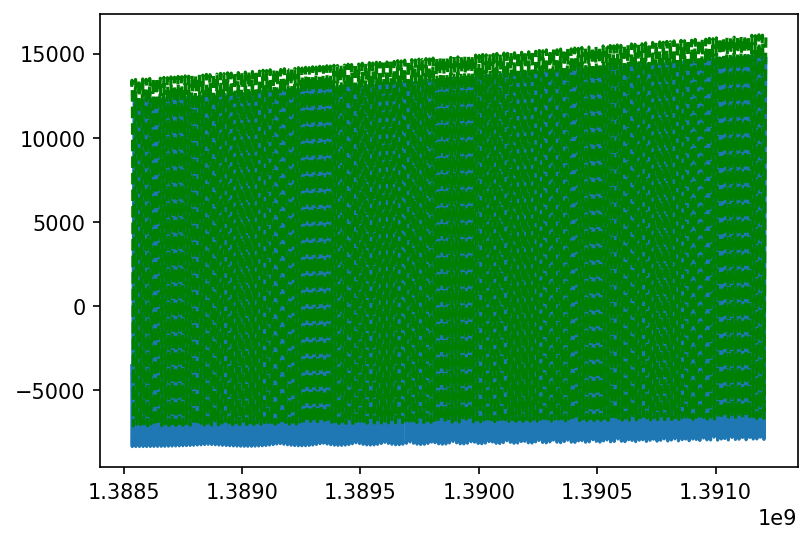

In [0]:
import matplotlib.pyplot as plt

i = 523
x = df_train[df_train['sat_id'] == i]['x'].values
t = np.array(df_train[df_train['sat_id'] == i]['epoch'])
f = make_series(x, t, T=3)
plt.figure(dpi=150)
#plt.xlim(t[-500], t[-1])
plt.plot(t, x)
plt.plot(t, f, 'g--')
print(smape(f, x))

In [0]:
df_train['epoch'] = np.array(pd.to_datetime(df_train['epoch']).astype(int)/10**9)
df_test['epoch'] = np.array(pd.to_datetime(df_test['epoch']).astype(int)/10**9)

In [0]:
from tqdm import tqdm_notebook

smape_res = []
targets = ['x','y', 'z', 'Vx', 'Vy', 'Vz']
models = {t:{} for t in targets}
train_test_result = {t:{} for t in targets}

counter_lgbm = 0
counter_sim = 0
for tar in tqdm_notebook(targets):
  for i in tqdm_notebook(df_test['sat_id'].unique()):
    x = df_train[df_train['sat_id'] == i][tar].values
    t = np.array(df_train[df_train['sat_id'] == i]['epoch'])
    f = make_series(x, t)
    x_sim = df_train[df_train['sat_id'] == i][tar+'_sim'].values

    if smape(f, x) < 0.2:
      if i in df_test['sat_id'].unique():
        t_test = np.array(df_test[df_test['sat_id'] == i]['epoch'])
        f = make_series(x, np.append(t, t_test))
        models[tar][i] = f[-len(t_test):]
        train_test_result[tar][i] = f
        smape_res.append(smape(f[:len(t)], x))
    else:
      if i in df_test['sat_id'].unique():
        t_test = np.array(df_test[df_test['sat_id'] == i]['epoch'])
        f = make_series(x, np.append(t,t_test))
        prediction_last, score, prediction = lgbm_fit_predict(tar, i)
        if score+score*0.1 < smape(f[:len(t)], x):
          counter_lgbm += 1
          models[tar][i] = prediction# + f[-len(t_test):])/2
          train_test_result[tar][i] = prediction
          smape_res.append(score)
        else:
          models[tar][i] = f[-len(t_test):]
          train_test_result[tar][i] = f
          smape_res.append(smape(f[:len(t)], x))
    if smape_res[-1] > smape(x_sim, x) and i in df_test['sat_id'].unique() and smape(x_sim, x) < 0.002:
      models[tar][i] = np.array(df_test[df_test['sat_id'] == i][tar+'_sim'])
      smape_res[-1] = smape(x_sim, x)
      counter_sim += 1
      
    if len(smape_res) > 0 and smape_res[-1] > 0.2 and i in df_test['sat_id'].unique() :
      ex = 10#len(find_all_extremus(x))
      scores = np.ones(ex+1)
      for T in range(4, ex):
        t_test = np.array(df_test[df_test['sat_id'] == i]['epoch'])
        try:
          f = make_series(x, np.append(t, t_test), T=T)
        except:
          continue
        scores[T] = smape(f[:len(t)], x)
      best = np.argsort(scores)[0]
      #print(best)
      if scores[best] < smape_res[-1]:
        smape_res[-1] = scores[best]
        f = make_series(x, np.append(t, t_test), T=best)
        train_test_result[tar][i] = f
        models[tar][i] = f[-len(t_test):]

    t_test = np.array(df_test[df_test['sat_id'] == i]['epoch'])
    f1 = make_series(x-x_sim, np.append(t, t_test))
    
    if smape(f1[:len(x)]+ x_sim, x) < 0.2 and smape(f1[:len(x)]+ x_sim, x) < smape_res[-1]:
      x_sim_test = df_test[df_test['sat_id'] == i][tar+'_sim'].values
      train_test_result[tar][i] = f1
      models[tar][i] = f1[-len(t_test):]+x_sim_test
      smape_res[-1] = smape(f1[:len(x)]+ x_sim, x)
    if len(smape_res) > 0 and smape_res[-1] > 0.2 and i in df_test['sat_id'].unique() :
      print(smape_res[-1], i, tar)
      f = make_series(x, np.append(t, t_test), start=1)
      if smape_res[-1] > smape(f[:len(t)], x):
        print('после', smape(f[:len(t)], x))
        models[tar][i] = f[-len(t_test):]
        train_test_result[tar][i] = f
        smape_res[-1] = smape(f[:len(t)], x)
    
print(np.mean(smape_res))

0.23808874867561342 37 x
0.21351713203780898 127 x
0.4399594934106553 253 x
после 0.37610531280671305
0.3622832579497359 372 x
0.4634379379026689 473 x
после 0.45135275276824205
0.2608263475524471 514 x
0.44243096170078056 523 x
0.4438456952971581 587 x
0.2007239018394311 588 x


0.23873086830635615 37 y
0.22568411367231617 127 y
0.45223870811369554 253 y
после 0.3961428345959424
0.3609825440097198 372 y
0.3526092796441152 473 y
0.2581970501329809 514 y
0.43994324778080285 523 y
0.5995564903789103 587 y
после 0.5251107463555036
0.2576481860662618 588 y


0.26629418620642314 37 z
0.21711425302530613 127 z


In [0]:
min(smape_res), max(smape_res)

In [0]:
smape_res = np.array(smape_res)
len(smape_res[smape_res>0.2])

In [0]:
print(counter_sim)
print(counter_lgbm)
print(1800 - (counter_sim + counter_lgbm))

In [0]:
pred = np.zeros(shape=(6, df_test.shape[0]))
j = 0
for t in tqdm_notebook(targets):
  for i in tqdm_notebook(df_test['sat_id'].unique()):
    features = [t+'_sim', 'epoch']
    x = df_test[df_test['sat_id'] == i][features]
    ind = x.index
    pred[j][ind] = models[t][i]
  j+=1

In [0]:
submission[targets] = pred.T

In [0]:
submission.to_csv(path+'submission.csv', index=None)
submission.head()